In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Epoch 1/100
575/575 [==============================] - 99s 164ms/step - loss: 1.7839 - accuracy: 0.2672 - val_loss: 1.7390 - val_accuracy: 0.3032
Epoch 2/100
575/575 [==============================] - 94s 163ms/step - loss: 1.7228 - accuracy: 0.3100 - val_loss: 1.6932 - val_accuracy: 0.3313
Epoch 3/100
575/575 [==============================] - 94s 163ms/step - loss: 1.6936 - accuracy: 0.3271 - val_loss: 1.6605 - val_accuracy: 0.3535
Epoch 4/100
575/575 [==============================] - 94s 163ms/step - loss: 1.6632 - accuracy: 0.3397 - val_loss: 1.6354 - val_accuracy: 0.3605
Epoch 5/100
575/575 [==============================] - 94s 164ms/step - loss: 1.6280 - accuracy: 0.3633 - val_loss: 1.6131 - val_accuracy: 0.3783
Epoch 6/100
575/575 [==============================] - 94s 163ms/step - loss: 1.6032 - accuracy: 0.3720 - val_loss: 1.5731 - val_accuracy: 0.3903
Epoch 7/100
575/575 [==============================] - 94s 163ms/step - loss: 1.5846 - accuracy: 0.3825 - val_loss: 1.5610 -

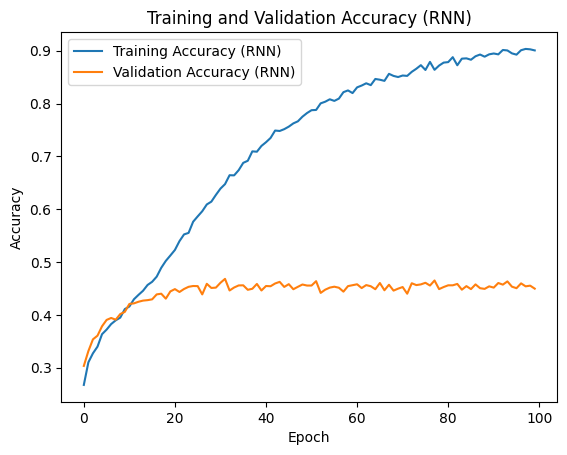

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(directory):
    images = []
    labels = []
    emotion_labels = os.listdir(directory)

    for label, emotion in enumerate(emotion_labels):
        emotion_dir = os.path.join(directory, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img)  # Do not flatten the image for RNN
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the data
root_dir = '/kaggle/input/emotion-detection-fer/'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

X_train, y_train = load_and_preprocess_data(train_dir)
X_test, y_test = load_and_preprocess_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(train_dir))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the Recurrent Neural Network (RNN) model
model_rnn = Sequential()
model_rnn.add(LSTM(256, input_shape=(48, 48), return_sequences=True))
model_rnn.add(Dropout(0.5))
model_rnn.add(LSTM(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print(f'Test Accuracy (RNN): {test_accuracy_rnn}')

# Visualize training history
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy (RNN)')
plt.title('Training and Validation Accuracy (RNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1]:
model_rnn.save('RNN.h5')

NameError: name 'model' is not defined